In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
training_set = pd.read_csv('Train_Titanic.csv')
training_set.head(10)


#Pclass : TIcket class (1 = 1st, 2 = 2nd, 3 = 3rd)
#Sex = Male, Female
#Age = Age in years
#SibSp = number of siblings/spouses aboard the Titanic
#Parch = number of parents/childern aboard the Titanic
#Ticket = Ticket Number
#Fare = Passenger fare
# Cabin  = Cabin Number
#Port Embarked : Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

#Target Class : Survived : Survival (0 = No , 1 = Yes )



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
training_set.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [4]:
training_set.shape



(891, 12)

In [5]:
training_set.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [6]:
survived = training_set[training_set['Survived']==1]

no_survived = training_set[training_set['Survived']==0]

In [7]:
print ('Number of passengers who survived = ', len(survived))

print ('Number of passengers who NOT survived = ', len(no_survived)) 

Number of passengers who survived =  342
Number of passengers who NOT survived =  549


In [10]:
print('% SURVIVED = ', 1.* len(survived)/len(training_set) *100)
print('% NOT SURVIVED = ', 1.* len(no_survived)/len(training_set) *100)

% SURVIVED =  38.38383838383838
% NOT SURVIVED =  61.61616161616161


<AxesSubplot:xlabel='Pclass', ylabel='count'>

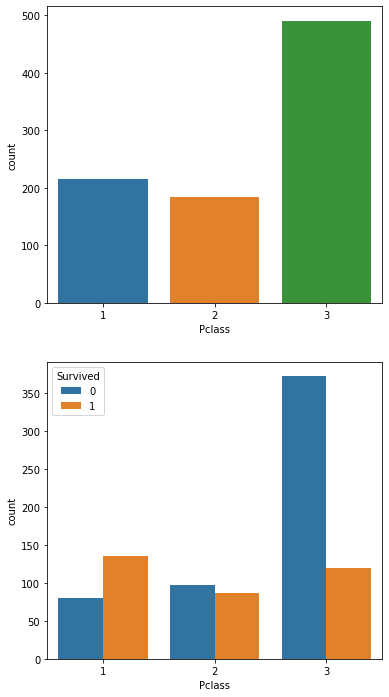

In [29]:
plt.figure (figsize = [6, 12])
plt.subplot(211)
sns.countplot( x = 'Pclass' ,data = training_set)

plt.subplot(212)

sns.countplot( x = 'Pclass' ,hue = 'Survived' ,data = training_set)

#if you are in class 3, your chance of surviving will be much less compared to class 1 and , only 1/3 of people in class 3 survived.


<AxesSubplot:xlabel='SibSp', ylabel='count'>

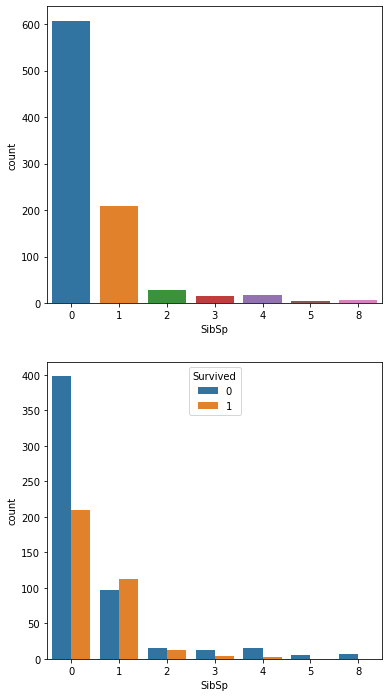

In [31]:
plt.figure (figsize = [6, 12])
plt.subplot(211)
sns.countplot( x = 'SibSp' ,data = training_set)

plt.subplot(212)

sns.countplot( x = 'SibSp' ,hue = 'Survived' ,data = training_set)

#Well, your chances of survival is actually low if you have no siblings
#higher chance of survial if you have 1 sibling and so on


<AxesSubplot:xlabel='Parch', ylabel='count'>

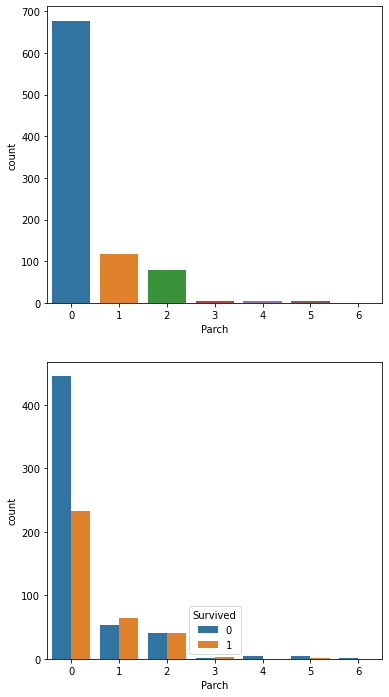

In [32]:
#checking the chance of survival if you have parents on board
plt.figure (figsize = [6, 12])
plt.subplot(211)
sns.countplot( x = 'Parch' ,data = training_set)

plt.subplot(212)

sns.countplot( x = 'Parch' ,hue = 'Survived' ,data = training_set)